<a href="https://colab.research.google.com/github/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/PerfilDesempenho_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

import warnings
warnings.filterwarnings('ignore')

In [98]:
#@title
dfEscola = pd.read_csv('https://github.com/mariaeco/Projeto_IntroducaoCienciasdeDados_UFPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')
dfEscola.drop([0],inplace=True) #primeira linha ta entrando com os nomes do index 'mean'(vindo da criaçao da tabela no arquivo 'ProjetoICD_OrganizacaoDadosTemporal.ipynb')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DadosEnem/ENEM_PB_1998_2019.csv',sep=',')
df['Internet'] = np.where(df['Internet'] == 0, "Não", "Sim")
df['Computador'] = np.where(df['Computador'] == 0, "Não", "Sim")
df['Celular'] = np.where(df['Celular'] == 0, "Não", "Sim")

dfEscola =dfEscola.query('NU_ANO>2002')
df =df.query('NU_ANO>2002')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_Mae,NPessoas,Renda,Celular,Computador,Internet,NU_NOTA_OBJETIVA,NU_MEDIA_GERAL
0,190001037515,2019,2507507.0,JOÃO PESSOA,25.0,PB,22.0,M,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pós-Graduação,Pós-Graduação,1.0,>30,Sim,Sim,Sim,NaN,NaN
1,190001125426,2019,2504009.0,CAMPINA GRANDE,25.0,PB,19.0,M,Branca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fundamental Incompleto,Ensino Médio Completo,4.0,<1,Sim,Não,Sim,NaN,NaN
2,190001141066,2019,2516607.0,TAVARES,25.0,PB,21.0,F,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,620.7,654.7,607.4,831.4,Inglês,1,160.0,180.0,200.0,160.0,160.0,920.0,Ensino Médio Completo,Pós-Graduação,4.0,2-5,Sim,Sim,Sim,678.6,799.3
3,190001141273,2019,2502409.0,BONITO DE SANTA FÉ,25.0,PB,36.0,M,Parda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fundamental Incompleto,Fundamental Completo,4.0,1-2,Sim,Não,Sim,NaN,NaN
4,190001165087,2019,2514503.0,SÃO JOSÉ DE PIRANHAS,25.0,PB,20.0,F,Não declarado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ensino Médio Completo,4.0,<1,Sim,Não,Sim,NaN,NaN


##**NOTAS GERAIS**

[Text(0, 0, 'Redação'),
 Text(0, 0, 'Provas Objetivas'),
 Text(0, 0, 'Linguagens'),
 Text(0, 0, 'Ciências Humanas'),
 Text(0, 0, 'Ciências da Natureza'),
 Text(0, 0, 'Matemática')]

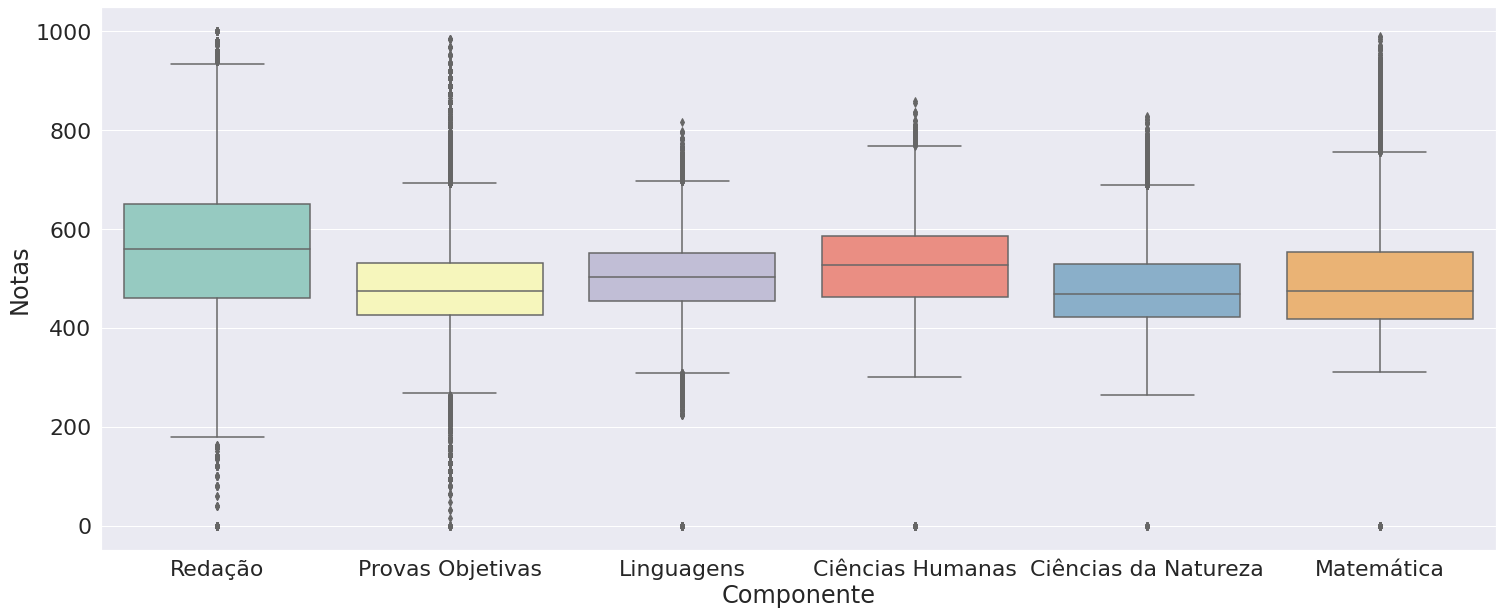

In [128]:
#@title
notas = dfEscola[['X_NOTA_REDACAO','X_NOTA_OBJETIVA','X_NOTA_LC','X_NOTA_CH','X_NOTA_CN','X_NOTA_MT']]
plot_notas = pd.melt(dfEscola, id_vars=['NU_ANO'], value_vars=notas)
plot_notas.rename(columns={'value': 'Notas', 'variable':'Componente'}, inplace=True)

plt.subplots(figsize=(25,10)) #fig, axes = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [1,4 ]})
sns.set_style("white")
sns.set(font_scale=2)

# geral
g = sns.boxplot(x="Componente",y="Notas", palette="Set3",data=plot_notas);
g.set_xticklabels(['Redação', 'Provas Objetivas', 'Linguagens','Ciências Humanas','Ciências da Natureza','Matemática'], rotation=0)

#no tempo
#years = plot_notas.query('NU_ANO>2008')
#sns.boxplot(ax=axes[1], x="NU_ANO", y="Notas", hue='Componente',palette="Set3",data=years);
#sns.lineplot(ax=axes[1], x='NU_ANO', hue ='Componente', y ='Notas',linewidth = 2,data = year)
#axes[1].set_xlabel('Ano', fontsize=18)
#axes[1].set_ylabel('Nota Média', fontsize=18)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##**ABAIXO ESCOLHA QUAL PERFIL DE NOTA DESEJA VER:**
1 - Nota Média Geral\
2 - Nota Média da Redação\
3 - Nota Média das Provas Objetivas\
4 - Nota Média em Linguagens\
5 - Nota Média em Ciências Humanas\
6 - Nota Média em Ciências da Natureza\
7 - Nota Média em Matemática

In [28]:
#@title
var = input('Digite o número correspondente a variável que deseja analisar: ')

Digite o número correspondente a variável que deseja analisar: 2


In [29]:
#@title
if var == '1':
    df['NOTA'] = df['NU_MEDIA_GERAL']
    nome ="Média Geral"
elif var == '2':
    df['NOTA']=  df['NU_NOTA_REDACAO']
    nome =" Nota Média da Redação"
elif var == '3':
    df['NOTA']=  df['NU_NOTA_OBJETIVA']
    nome =" Nota Média das Provas Objetivas"
elif var == '4':
    df['NOTA']=  df['NU_NOTA_LC']
    nome ="  Nota Média em Linguagens"
elif var == '5':
    df['NOTA']=  df['NU_NOTA_CH']
    nome ="  Nota Média em Ciências Humanas"
elif var == '6':
    df['NOTA']=  df['NU_NOTA_CN']
    nome =" Nota Média em Ciências da Natureza"
elif var == '7':
    df['NOTA']=  df['NU_NOTA_MT']
    nome ="  Nota Média em Matemática"


#**DESEMPENHO POR NOTA ESCOLHIDA**

##**Nota Média por Categoria**

Text(0, 0.5, 'Possui Internet?')

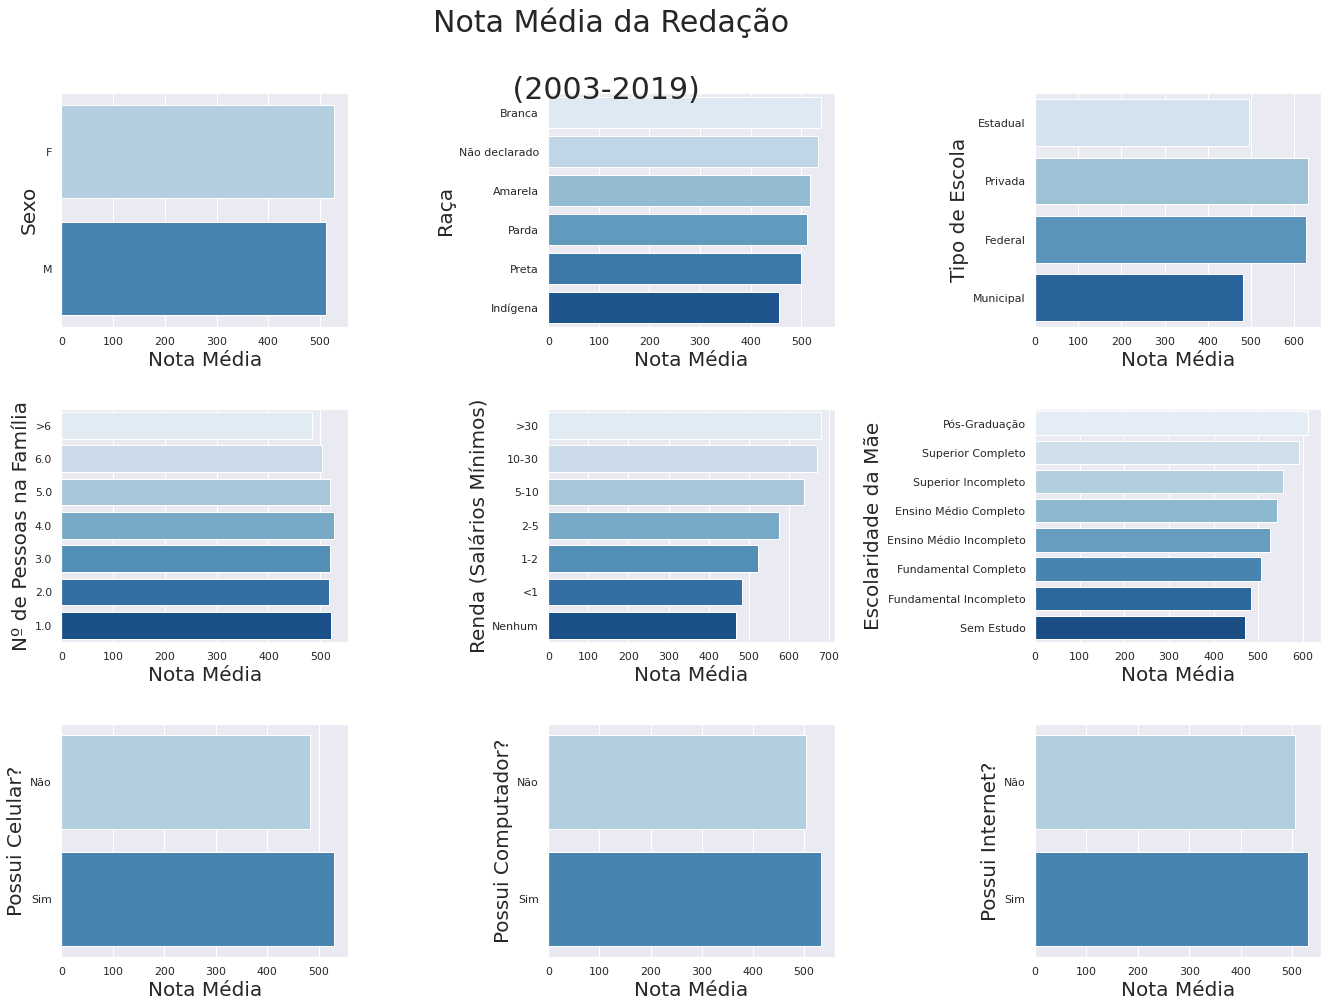

In [30]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle(f' {nome}\n \n (2003-2019)', fontsize=30)
 
# Distancia entre os subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.35)

#SEXO =================================================================================================================
sexo=df.groupby(by=['TP_SEXO'], as_index=False)['NOTA'].mean()
sexo['NOTA']=sexo['NOTA']
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 0], y ='TP_SEXO', x ='NOTA', palette = 'Blues',data = sexo)
axes[0,0].set_xlabel('Nota Média', fontsize=20)
axes[0,0].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=df.groupby(by=['TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca['NOTA']=raca['NOTA']
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 1], y ='TP_COR_RACA', x ='NOTA', palette = 'Blues', data = raca)
axes[0,1].set_xlabel('Nota Média', fontsize=20)
axes[0,1].set_ylabel('Raça', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()
tipEsc['NOTA']=tipEsc['NOTA']

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='NOTA', palette = 'Blues', order=order, data = tipEsc)
axes[0,2].set_xlabel('Nota Média', fontsize=20)
axes[0,2].set_ylabel('Tipo de Escola', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
df['NP'] = np.where(df['NPessoas'] > 6, ">6", df['NPessoas'] )
nPessoas=df.groupby(by=['NP'], as_index=False)['NOTA'].mean()
nPessoas['NOTA']=nPessoas['NOTA']

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='NOTA', palette = 'Blues',order=order, data = nPessoas)
axes[1,0].set_xlabel('Nota Média', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=df.groupby(by=['Renda'], as_index=False)['NOTA'].mean()
renda['NOTA']=renda['NOTA']

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='NOTA', palette = 'Blues',order=order, data = renda)
axes[1,1].set_xlabel('Nota Média', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc['NOTA']=esc['NOTA']
esc.sort_values(by='NOTA',ascending=False, inplace=True)

order_esc = ['Pós-Graduação', 'Superior Completo','Superior Incompleto',
         'Ensino Médio Completo', 'Ensino Médio Incompleto',
         'Fundamental Completo', 'Fundamental Incompleto','Sem Estudo' ]
sns.barplot(ax=axes[1, 2], y ='Escolaridade_Mae', x ='NOTA', palette = 'Blues', 
            order=order_esc, data = esc)
axes[1,2].set_xlabel('Nota Média', fontsize=20)
axes[1,2].set_ylabel('Escolaridade da Mãe', fontsize=20)


#CELULAR ================================================================================================================================
cel=df.groupby(by=['Celular'], as_index=False)['NOTA'].mean()
cel['NOTA']=cel['NOTA']

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NOTA', palette = 'Blues', data = cel)
axes[2,0].set_xlabel('Nota Média', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=df.groupby(by=['Computador'], as_index=False)['NOTA'].mean()
comp['NOTA']=comp['NOTA']

sns.barplot(ax=axes[2, 1], y ='Computador', x ='NOTA', palette = 'Blues', data = comp)
axes[2,1].set_xlabel('Nota Média', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=df.groupby(by=['Internet'], as_index=False)['NOTA'].mean()
intern['NOTA']=intern['NOTA']

sns.barplot(ax=axes[2, 2], y ='Internet', x ='NOTA', palette = 'Blues', data = intern)
axes[2,2].set_xlabel('Nota Média', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

##**Nota Média por Categoria ao Longo dos Anos**

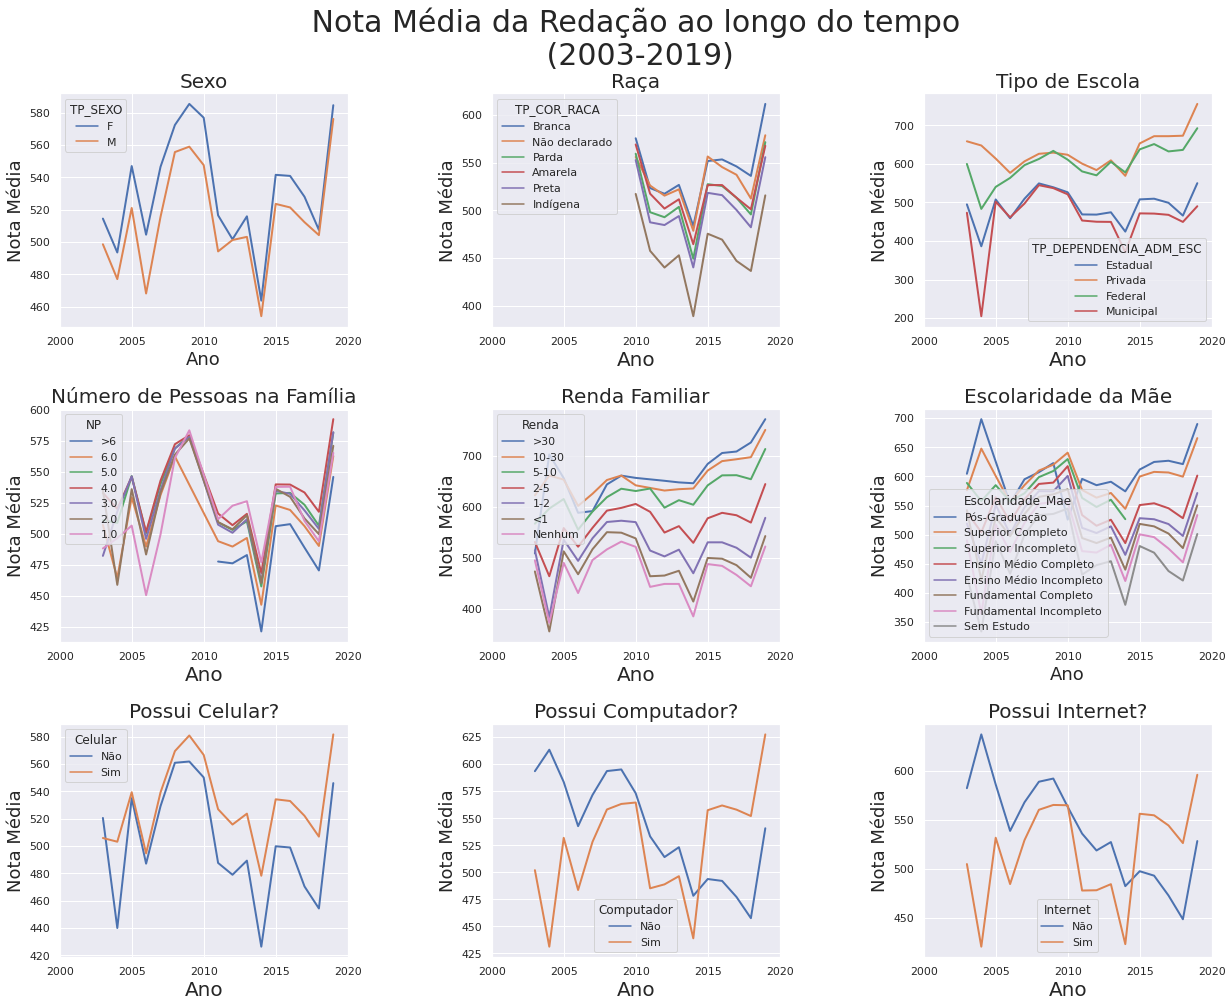

In [31]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set_style("white")
sns.set(font_scale=1)

# Distancia entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

fig.suptitle(f'{nome} ao longo do tempo \n (2003-2019)', fontsize=30)

#SEXO =================================================================================================================
sexo=df.groupby(by=['NU_ANO','TP_SEXO'], as_index=False)['NOTA'].mean()
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 0], x='NU_ANO', hue ='TP_SEXO', y ='NOTA',linewidth = 2,data = sexo)
axes[0,0].set_xlabel('Ano', fontsize=18)
axes[0,0].set_ylabel('Nota Média', fontsize=18)
axes[0,0].set_title('Sexo', fontsize=20)
axes[0,0].set_xticks([2000,2005,2010,2015,2020])

#RAÇA =================================================================================================================
raca=df.groupby(by=['NU_ANO','TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 1], x='NU_ANO', hue ='TP_COR_RACA', y ='NOTA', linewidth = 2, data = raca)
axes[0,1].set_xlabel('Ano', fontsize=20)
axes[0,1].set_ylabel('Nota Média', fontsize=18)
axes[0,1].set_title('Raça', fontsize=20)
axes[0,1].set_xticks([2000,2005,2010,2015,2020])

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['NU_ANO','TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.lineplot(ax=axes[0, 2], x='NU_ANO', hue ='TP_DEPENDENCIA_ADM_ESC', y='NOTA', linewidth = 2, hue_order=order, data = tipEsc)
axes[0,2].set_xlabel('Ano', fontsize=20)
axes[0,2].set_ylabel('Nota Média', fontsize=18)
axes[0,2].set_title('Tipo de Escola', fontsize=20)
axes[0,2].set_xticks([2000,2005,2010,2015,2020])

#N DE PESSOAS NA CASA =================================================================================================================
nPessoas=df.groupby(by=['NU_ANO','NP'], as_index=False)['NOTA'].mean()

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.lineplot(ax=axes[1, 0], x ='NU_ANO', hue ='NP', y ='NOTA',hue_order=order, linewidth = 2, data = nPessoas)
axes[1,0].set_xlabel('Ano', fontsize=20)
axes[1,0].set_ylabel('Nota Média', fontsize=18)
axes[1,0].set_title('Número de Pessoas na Família', fontsize=20)
axes[1,0].set_xticks([2000,2005,2010,2015,2020])

#RENDA ================================================================================================================================
renda=df.groupby(by=['NU_ANO','Renda'], as_index=False)['NOTA'].mean()

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.lineplot(ax=axes[1, 1], x='NU_ANO', hue ='Renda', y ='NOTA', linewidth = 2,hue_order=order, data = renda)
axes[1,1].set_xlabel('Ano', fontsize=20)
axes[1,1].set_ylabel('Nota Média', fontsize=18)
axes[1,1].set_title('Renda Familiar', fontsize=20)
axes[1,1].set_xticks([2000,2005,2010,2015,2020])

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['NU_ANO','Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[1, 2], x='NU_ANO', hue ='Escolaridade_Mae', y ='NOTA', 
             linewidth = 2, hue_order=order_esc, data = esc)
axes[1,2].set_xlabel('Ano', fontsize=18)
axes[1,2].set_ylabel('Nota Média', fontsize=18)
axes[1,2].set_title('Escolaridade da Mãe', fontsize=20)
axes[1,2].set_xticks([2000,2005,2010,2015,2020])

#CELULAR ================================================================================================================================
cel=df.groupby(by=['NU_ANO','Celular'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 0], x='NU_ANO', hue ='Celular', y ='NOTA',  
             linewidth = 2, data = cel)
axes[2,0].set_xlabel('Ano', fontsize=20)
axes[2,0].set_ylabel('Nota Média', fontsize=18)
axes[2,0].set_title('Possui Celular?', fontsize=20)
axes[2,0].set_xticks([2000,2005,2010,2015,2020])

#Computador ================================================================================================================================
comp=df.groupby(by=['NU_ANO','Computador'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 1], x='NU_ANO', hue ='Computador', y ='NOTA', 
             linewidth = 2, data = comp)
axes[2,1].set_xlabel('Ano', fontsize=20)
axes[2,1].set_ylabel('Nota Média', fontsize=18)
axes[2,1].set_title('Possui Computador?', fontsize=20)
axes[2,1].set_xticks([2000,2005,2010,2015,2020])

#Internet ================================================================================================================================
intern=df.groupby(by=['NU_ANO','Internet'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 2], x='NU_ANO', hue ='Internet', y ='NOTA',
             linewidth = 2, data = intern)
axes[2,2].set_xlabel('Ano', fontsize=20)
axes[2,2].set_ylabel('Nota Média', fontsize=18)
axes[2,2].set_title('Possui Internet?', fontsize=20)
axes[2,2].set_xticks([2000,2005,2010,2015,2020])